Importing libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
sns.set(style="whitegrid")


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
# Load the datasets into pandas dataframes
cab_data = pd.read_csv('/content/drive/MyDrive/DataSets/Cab_Data.csv')
city_data = pd.read_csv('/content/drive/MyDrive/DataSets/City.csv')
customer_id_data = pd.read_csv('/content/drive/MyDrive/DataSets/Customer_ID.csv')
transaction_id_data = pd.read_csv('/content/drive/MyDrive/DataSets/Transaction_ID.csv')

# Display the first few rows of each dataset
print("Cab Data:")
print(cab_data.head())
print("\nCity Data:")
print(city_data.head())
print("\nCustomer ID Data:")
print(customer_id_data.head())
print("\nTransaction ID Data:")
print(transaction_id_data.head())


Cab Data:
   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  

City Data:
             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 

Customer ID Data:
   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male  

In [10]:
# Check for missing values and data types for each dataset
print("Cab Data Info:")
print(cab_data.info())
print("\nMissing Values in Cab Data:\n", cab_data.isnull().sum())
print("\nCab Data Statistics:\n", cab_data.describe())

print("\nCity Data Info:")
print(city_data.info())
print("\nMissing Values in City Data:\n", city_data.isnull().sum())
print("\nCity Data Statistics:\n", city_data.describe())

print("\nCustomer ID Data Info:")
print(customer_id_data.info())
print("\nMissing Values in Customer ID Data:\n", customer_id_data.isnull().sum())
print("\nCustomer ID Data Statistics:\n", customer_id_data.describe())

print("\nTransaction ID Data Info:")
print(transaction_id_data.info())
print("\nMissing Values in Transaction ID Data:\n", transaction_id_data.isnull().sum())
print("\nTransaction ID Data Statistics:\n", transaction_id_data.describe())


Cab Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None

Missing Values in Cab Data:
 Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

Cab Data Statistics:
        Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22

In [11]:
# Handle missing values (if any exist)
cab_data = cab_data.dropna()
city_data = city_data.dropna()
customer_id_data = customer_id_data.dropna()
transaction_id_data = transaction_id_data.dropna()

# Verify if there are still missing values
print("\nMissing Values after Cleaning:\n")
print(cab_data.isnull().sum())
print(city_data.isnull().sum())
print(customer_id_data.isnull().sum())
print(transaction_id_data.isnull().sum())



Missing Values after Cleaning:

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [12]:
# Convert the 'Date of Travel' column in cab_data from serial date format to readable datetime format
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], origin='1899-12-30', unit='D')
print(cab_data['Date of Travel'].head())


0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]


In [13]:
# Merge cab_data with transaction_id_data on 'Transaction ID'
merged_data = pd.merge(cab_data, transaction_id_data, on='Transaction ID', how='inner')
print("\nMerged Data (Cab and Transaction ID):\n", merged_data.head())

# Merge the merged_data with customer_id_data on 'Customer ID'
merged_data = pd.merge(merged_data, customer_id_data, on='Customer ID', how='inner')
print("\nMerged Data (With Customer Info):\n", merged_data.head())

# Merge merged_data with city_data on 'City'
final_data = pd.merge(merged_data, city_data, on='City', how='inner')
print("\nFinal Data:\n", final_data.head())




Merged Data (Cab and Transaction ID):
    Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card  

Merged Data (With Customer Info):
    Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30

In [14]:
# Check for duplicate entries in the final merged data
duplicates = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If there are duplicates, remove them
final_data = final_data.drop_duplicates()


Number of duplicate rows: 0


In [15]:
# Basic descriptive analysis on numerical columns
print("\nFinal Data Statistics:\n", final_data.describe())



Final Data Statistics:
        Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.

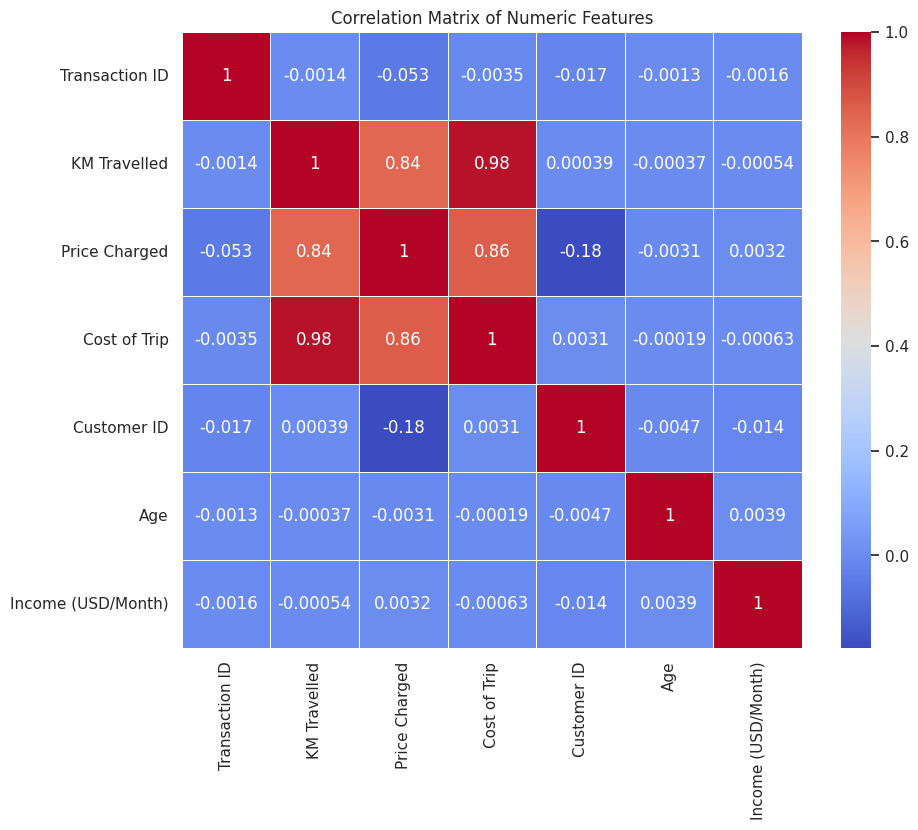

In [17]:
# Select only numeric columns for correlation
numeric_columns = final_data.select_dtypes(include=[np.number])

# Plot the correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

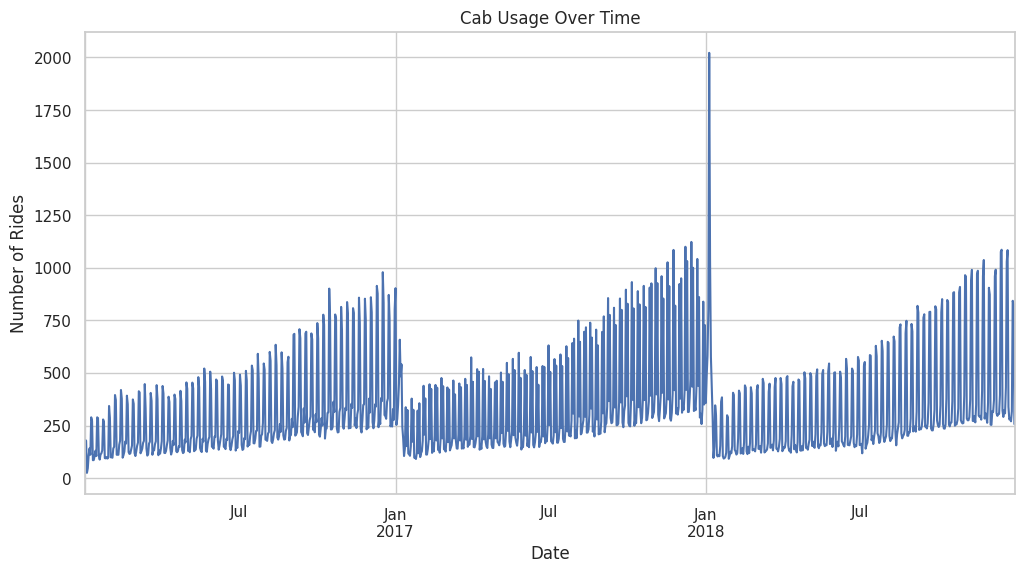

In [18]:
# Group by 'Date of Travel' to see the trend of cab usage over time
cab_usage = final_data.groupby('Date of Travel').size()
plt.figure(figsize=(12, 6))
cab_usage.plot()
plt.title('Cab Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()


Hypothesis 1: There is a seasonality in the number of customers using the cab service.

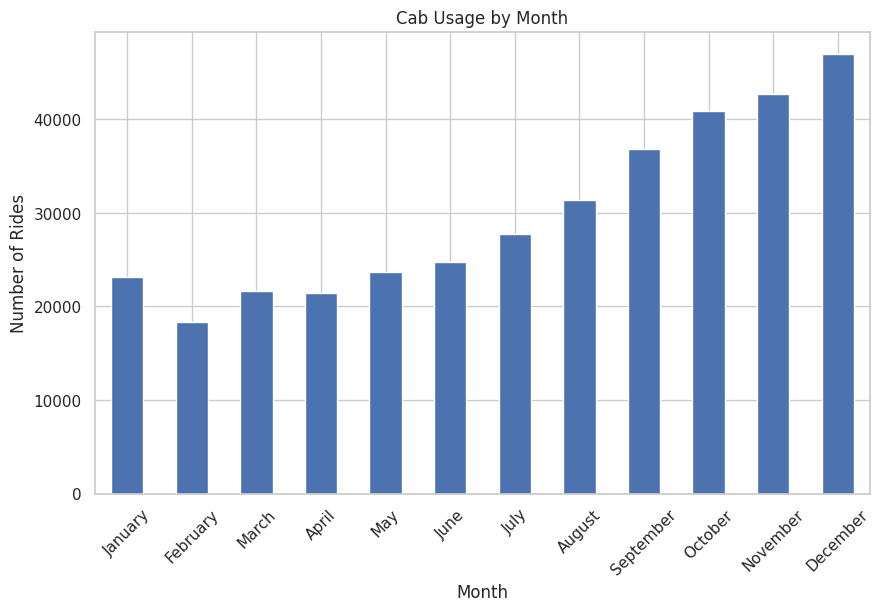

In [20]:
# Ensure the 'Date of Travel' column is in datetime format
final_data['Date of Travel'] = pd.to_datetime(final_data['Date of Travel'])

# Create a 'Month' column by extracting the month from 'Date of Travel'
final_data['Month'] = final_data['Date of Travel'].dt.month_name()

# Now you can group by 'Month'
seasonality = final_data.groupby('Month').size()
plt.figure(figsize=(10, 6))
seasonality = seasonality.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                    'August', 'September', 'October', 'November', 'December'])
seasonality.plot(kind='bar')
plt.title('Cab Usage by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()


Hypothesis 2: Yellow Cab has a higher average fare per ride compared to Pink Cab.

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'Month'],
      dtype='object')


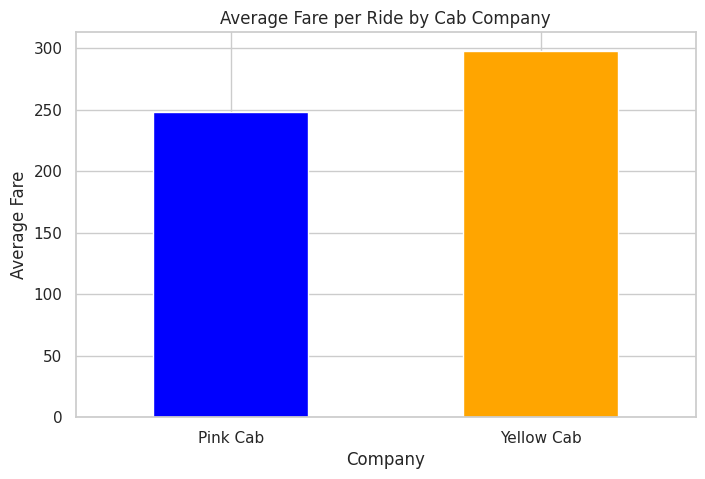

In [25]:
print(final_data.columns)

avg_fare_company = final_data.groupby('Company')['Cost of Trip'].mean()
plt.figure(figsize=(8, 5))
avg_fare_company.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Fare per Ride by Cab Company')
plt.ylabel('Average Fare')
plt.xticks(rotation=0)
plt.show()

Hypothesis 3: Customers using Yellow Cab are more likely to pay with credit cards than those using  Pink Cab.


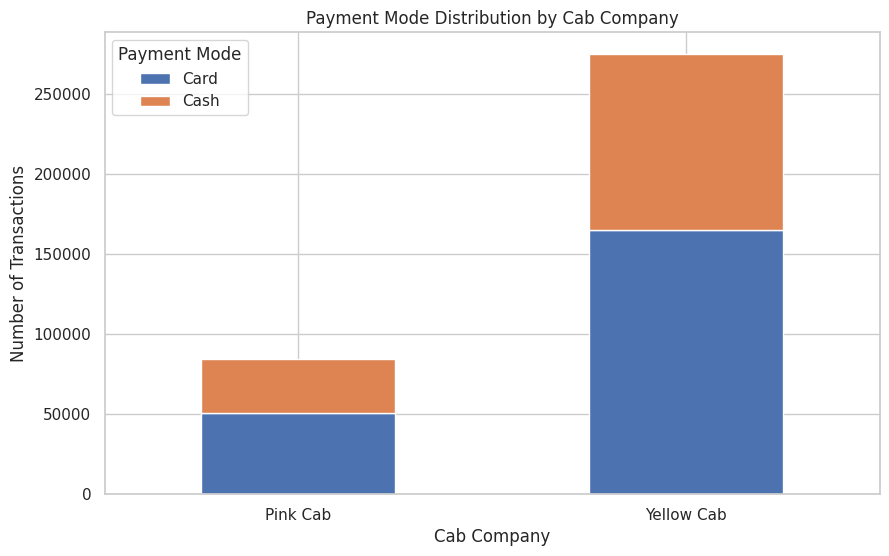

In [26]:
payment_mode_company = final_data.groupby(['Company', 'Payment_Mode']).size().unstack()
payment_mode_company.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Payment Mode Distribution by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Payment Mode')
plt.show()

 Hypothesis 5: Larger cities have more cab users than smaller cities.

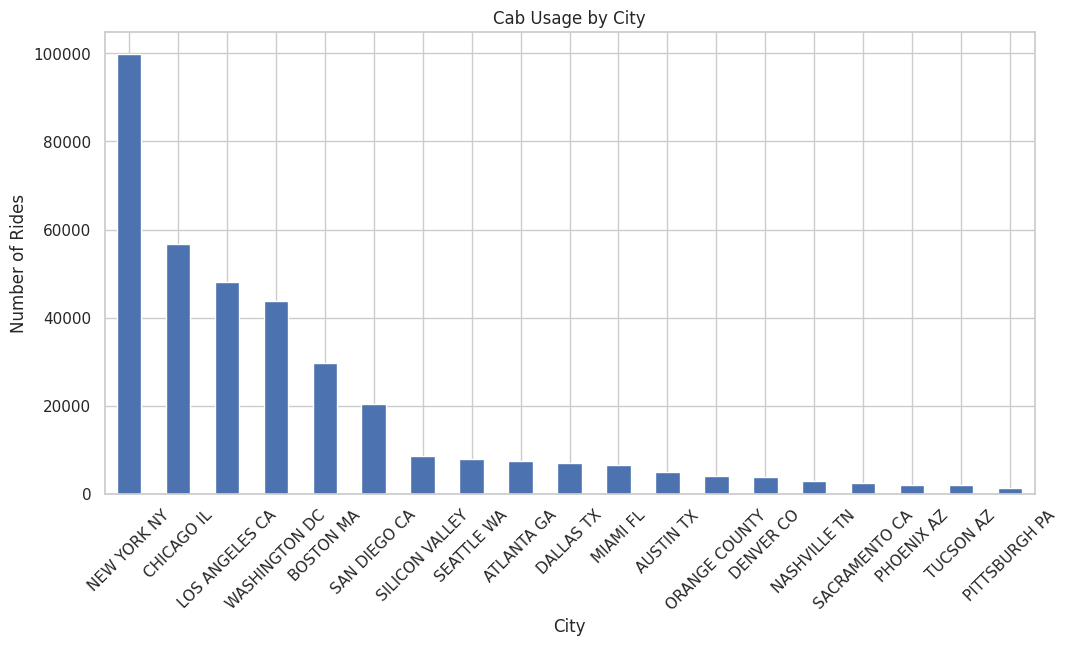

In [27]:
city_cab_usage = final_data.groupby('City')['Customer ID'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
city_cab_usage.plot(kind='bar')
plt.title('Cab Usage by City')
plt.xlabel('City')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

Hypothesis 6: Customer demographics influence the choice of cab company.


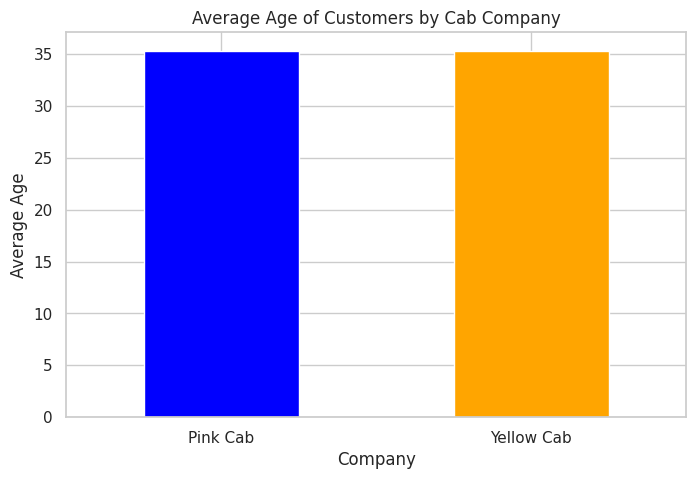

In [28]:
# Assuming 'Age' is a demographic feature in the customer_id_data
demographic_choice = final_data.groupby('Company')['Age'].mean()
plt.figure(figsize=(8, 5))
demographic_choice.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Age of Customers by Cab Company')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

In [29]:
# Export the final cleaned data as CSV
final_data.to_csv('/content/drive/MyDrive/DataSets/Cleaned_Cab_Data.csv', index=False)
